In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_excel("C:\\Users\\nikba\\.vscode\\Projects\\Scientific_work\\data\\hot_pixels.xlsx")
df = df[["Лазер","процентиль %"]]
df.dropna(inplace=True)

In [2]:
df

,Лазер,процентиль %
1,550.9914,245508.70
2,551.0832,248498.70
3,551.1750,248888.70
4,551.2668,246128.70
5,551.3586,246212.70
...,...,...
2037,719.8205,34606.73
2038,719.8934,34302.73
2039,719.9664,33148.73
2040,720.0392,32800.73


In [3]:
df["процентиль %"].to_numpy()

array([245508.7 , 248498.7 , 248888.7 , ...,  33148.73,  32800.73,
        33260.73], shape=(2041,))

In [48]:
df = df[["Лазер","процентиль %"]]
df.dropna(inplace=True)
percentile = 90
idx = df.index
filt = [0]
for i in range(1, len(idx)-1):
    x_1 = df["процентиль %"].loc[idx[i-1]]
    x_2 = df["процентиль %"].loc[idx[i]]
    x_3 = df["процентиль %"].loc[idx[i+1]]
    filt.append(abs((x_2 - x_1) * (x_3 - x_2)))
filt.append(0)
df["фильтр"] = filt
raman_perc = df["фильтр"].quantile(percentile/100)
raman_perc

C:\Users\nikba\AppData\Local\Temp\ipykernel_14456\2060501957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


np.float64(3635580.0)

In [49]:
filtered_raman = []
window = 2
for i in range(len(idx)):
    if df["фильтр"].loc[idx[i]] < raman_perc:
        filtered_raman.append(df["процентиль %"].loc[idx[i]])
    else:
        x1 = df["процентиль %"].loc[i - window]
        x2 = df["процентиль %"].loc[i + window]
        filtered_raman.append((x1 + x2) / 2)
df["обработанный"] =  filtered_raman

In [67]:
def delete_hot_pixels(arr: list, q=0.95, window = 3):
    buf_arr = pd.Series(np.array([]))
    for i in range(1, len(arr) - 1):
        x1 = arr[i-1]
        x2 = arr[i]
        x3 = arr[i+1]
        buf_arr[i] = abs((x2-x1)*(x3-x2))
    q_value = buf_arr.quantile(q)
    print(q_value)
    filtered_arr = [arr[0]]
    for i in range(1, len(arr)-1):
        if buf_arr[i] > q_value:
            filtered_arr.append((arr[i-window] + arr[i+window]) / 2)
        else:
            filtered_arr.append(arr[i])
    filtered_arr.append(arr[-1])
    return filtered_arr

In [74]:
filt = delete_hot_pixels(df["процентиль %"].to_list(), q=0.90, window=3)

3644320.000000002


In [75]:
df["обработанный"] = filt

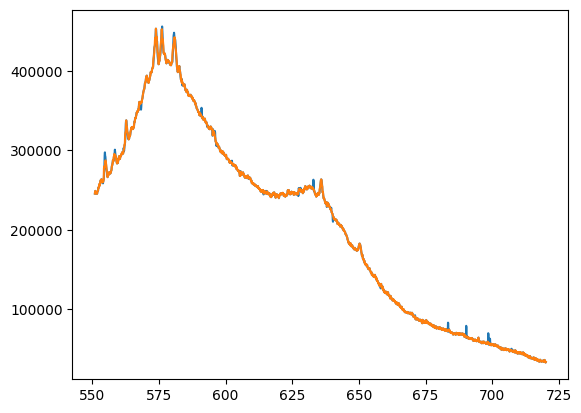

In [76]:
plt.plot(df["Лазер"], df["процентиль %"])
plt.plot(df["Лазер"], df["обработанный"])